In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load data Train

In [10]:
X_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 1)


for img in glob.glob(r"/content/drive/MyDrive/datasets2/Covid19-dataset/train/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 2)

# Prepare and load data Test

In [15]:
X_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 2)

In [16]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D



# build the network

In [48]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [49]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 128)       

# train the model

In [50]:
history = model.fit( X_train, y_train, epochs = 100, verbose=1 ,  validation_split=0.2  )

Epoch 1/100
5/5 [==============================] - 1s 66ms/step - loss: 1.0712 - accuracy: 0.3986 - val_loss: 1.2165 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.9793 - accuracy: 0.5068 - val_loss: 1.4675 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.8601 - accuracy: 0.6486 - val_loss: 0.9232 - val_accuracy: 0.4211
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6015 - accuracy: 0.7365 - val_loss: 0.9219 - val_accuracy: 0.5263
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.4417 - accuracy: 0.8176 - val_loss: 0.3382 - val_accuracy: 0.8684
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.4360 - accuracy: 0.8108 - val_loss: 0.6406 - val_accuracy: 0.6842
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.3580 - accuracy: 0.8378 - val_loss: 0.2092 - val_accuracy: 0.9211
Epoch 8/100


# plot the loss and the accuracy per epochs lineplot

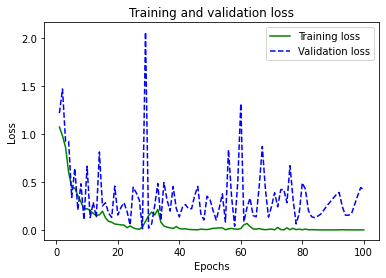

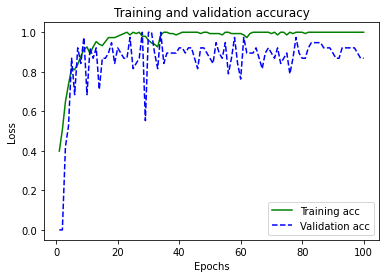

In [51]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', linestyle='dashed', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', linestyle='dashed', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()


# train & test loss and accuracy

In [52]:
score = model.evaluate(X_train , y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy: ', score[1]*100.0 ,'%')

Train loss: 0.08534479886293411
Train accuracy:  97.31183052062988 %


In [53]:
score = model.evaluate(X_test , y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0 ,'%')

Test loss: 0.8550085425376892
Test accuracy:  86.53846383094788 %
